In [95]:
# File: linear_regression_one_varialbe
# Name: 
# ----------------------------
# This file shows the fundamental concepts of 
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#   - training process

In [96]:
import matplotlib.pyplot as plt
import numpy as np

In [97]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / 2*m
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta1(x_i) + b
# ----------------------------------------
# x_list: list, containing 21 data points
# y_list: list, containing 21 data points
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# return: floar, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum((theta1*(x[i]**3) + theta2*(x[i]**2)+theta3*x[i] +b-y[i])**2 for i in range(len(x)))/ (len(x)*2)
        

In [98]:
cost_function(0.5, 0.5, 0.5,0.5,[1,2,3],[1,2,3])

53.375

In [99]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum((theta1*(x[i]**3) + theta2*(x[i]**2)+theta3*x[i] +b-y[i])*(x[i]**3) for i in range(len(x))) /len(x)


In [100]:
dJ_dtheta1(0.5,0.5,0.5,0.5,[1,2,3],[1,2,3])

168.0

In [101]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
    return sum((theta1*(x[i]**3) + theta2*(x[i]**2)+theta3*x[i] +b-y[i])*(x[i]**2) for i in range(len(x))) /len(x)

In [102]:
dJ_dtheta2(0.5,0.5,0.5,0.5,[1,2,3],[1,2,3])

58.666666666666664

In [103]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
    return sum((theta1*(x[i]**3) + theta2*(x[i]**2)+theta3*x[i] +b-y[i])*x[i] for i in range(len(x))) /len(x)


In [104]:
dJ_dtheta3(0.5,0.5,0.5,0.5,[1,2,3],[1,2,3])

21.0

In [105]:
def dJ_db(theta1, theta2, theta3, b, x, y):
    return sum((theta1*(x[i]**3) + theta2*(x[i]**2)+theta3*x[i] +b-y[i]) for i in range(len(x))) /len(x)
    

In [106]:
dJ_db(0.5,0.5,0.5,0.5,[1,2,3],[1,2,3])

7.833333333333333

In [107]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [108]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [109]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [110]:
x = np.array(x)
x_2 = x*x
x_3 = x_2*x
c = np.ones(21)

In [111]:
X = np.concatenate((x, x_2, x_3, c), axis=0).reshape(4, 21).T
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [112]:
regr.fit(X, y)

LinearRegression()

In [113]:
regr.coef_

array([-2.45512913,  0.52664216, -0.01695167,  0.        ])

In [114]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

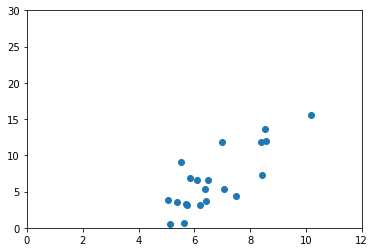

In [115]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [116]:
# Please do feature scaling by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x = list((x[i]-min(x))/(max(x)-min(x)) for i in range(len(x)))
y = list((y[i]-min(y))/(max(y)-min(y)) for i in range(len(y)))

In [117]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

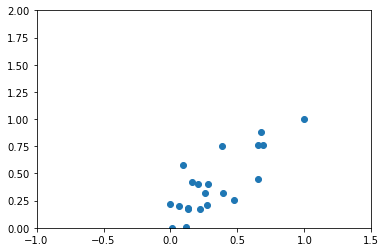

In [118]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [119]:
# ------------ Initialize your theta ------------ #
# --------- Randomly choose from -5 to +5 ---------- #

In [120]:
theta1 = -0.01695167 # TODO:
theta2 = 0.52664216 # TODO:
theta3 = -2.45512913 # TODO:
b = 0 # TODO:


In [121]:
# ---------- Initialize your alpha ---------- #

In [122]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [123]:
alpha = 0.001 # TODO:

In [124]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [125]:
# Remember to append updated theta1, theta2, theta3, b to 
# The lists as well as the updated cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    
    cost_history.append(cost_function(theta1, theta2, theta3, b, x, y))
    
    theta1 -= alpha * dJ_dtheta1(theta1, theta2, theta3, b, x, y)
    theta2 -= alpha * dJ_dtheta2(theta1, theta2, theta3, b, x, y)
    theta3 -= alpha * dJ_dtheta3(theta1, theta2, theta3, b, x, y)
    b -= alpha * dJ_db(theta1, theta2, theta3, b, x, y)

In [126]:
# ---------- Cost changes during training process ---------- #

In [127]:
# Pay attention to the trend of cost. 
# Is is rising? If it is, why?

print(cost_history)

[0.9163470032967866, 0.9145745140851551, 0.912806098060831, 0.9110417456793476, 0.9092814474186595, 0.9075251937790908, 0.9057729752832804, 0.9040247824761319, 0.9022806059247592, 0.9005404362184354, 0.8988042639685416, 0.8970720798085136, 0.8953438743937893, 0.893619638401759, 0.8918993625317144, 0.8901830375047928, 0.8884706540639306, 0.8867622029738099, 0.885057675020807, 0.8833570610129429, 0.8816603517798304, 0.879967538172626, 0.8782786110639769, 0.8765935613479715, 0.8749123799400891, 0.873235057777149, 0.8715615858172622, 0.8698919550397778, 0.8682261564452374, 0.8665641810553221, 0.8649060199128042, 0.8632516640814966, 0.8616011046462055, 0.8599543327126786, 0.8583113394075574, 0.8566721158783271, 0.8550366532932692, 0.8534049428414102, 0.8517769757324768, 0.8501527431968411, 0.8485322364854785, 0.8469154468699155, 0.8453023656421821, 0.8436929841147647, 0.8420872936205568, 0.8404852855128113, 0.8388869511650935, 0.837292281971232, 0.8357012693452717, 0.8341139047214277]


In [128]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: -0.01695167, theta2: 0.52664216, theta3: -2.45512913, b: 0


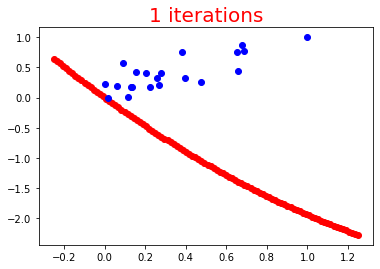

In [141]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: -0.01444049220586643, theta2: 0.5299710127823235, theta3: -2.450085800411495, b: 0.009974371204867181


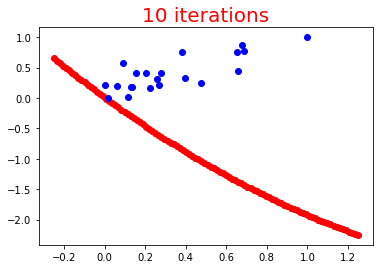

In [130]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: -0.01167204452018825, theta2: 0.5336397051131803, theta3: -2.4445322922498582, b: 0.020925642293820435


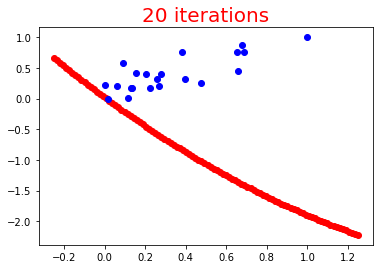

In [131]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [132]:
# ---------- Plot the errors over the training process ---------- #

theta1: -0.008926248508973528, theta2: 0.5372771238727788, theta3: -2.439031036253476, b: 0.03174021151903011


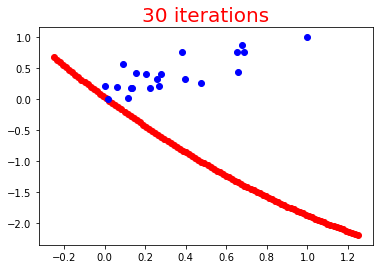

In [133]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: -0.006202855718520195, theta2: 0.5408836168977383, theta3: -2.433581438352352, b: 0.042419690198433654


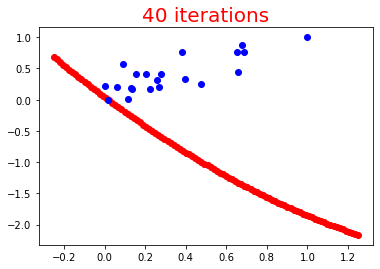

In [134]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

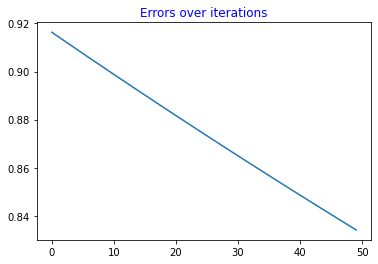

In [135]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')